## Performing EDA Analysis on the data
This notebook will focus on the following main objectives:
# Data Summarization
# Data Quality Assessment
# Univariate Analysis
# Bivariate or Multivariate Analysis
# Data Comparision
# Outlier Detection
# Visualization


In [3]:
import pandas as pd

# Load the data
file_path = '../data/MachineLearningRating_v3.txt'  
data = pd.read_csv(file_path, delimiter='|')  

print(data.head())

C:\Users\arsem\AppData\Local\Temp\ipykernel_19288\3744290036.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [4]:
# Display the shape of the DataFrame (number of rows and columns)
print("Shape of the DataFrame:", data.shape)

# Display the names of the columns
print("Column Names:", data.columns.tolist())

# Check for null values in each column
print("Null Values in Each Column:\n", data.isnull().sum())

Shape of the DataFrame: (1000098, 52)
Column Names: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
Null Values in Each Column:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegi

In [5]:
# Check unique values in key columns
print("Unique values in 'Gender':", data['Gender'].unique())
print("Unique values in 'MaritalStatus':", data['MaritalStatus'].unique())
print("Unique values in 'VehicleType':", data['VehicleType'].unique())

# Display basic statistics of numerical columns
print("Basic Statistics:\n", data.describe())

Unique values in 'Gender': ['Not specified' 'Male' 'Female' nan]
Unique values in 'MaritalStatus': ['Not specified' 'Married' 'Single' nan]
Unique values in 'VehicleType': ['Passenger Vehicle' 'Medium Commercial' 'Heavy Commercial'
 'Light Commercial' 'Bus' nan]
Basic Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts 

## Key Findings

# Unique Values:

Gender: Options include "Not specified," "Male," "Female," and some null values.
Marital Status: Options include "Not specified," "Married," "Single," and some null values.
Vehicle Type: Options include categories like "Passenger Vehicle," "Medium Commercial," "Heavy Commercial," "Light Commercial," "Bus," and some null values.

# Basic Statistics:

The statistics provide a summary for various numerical columns, which can help assess data quality and identify potential outliers. For example:
Cylinders: Most vehicles have 4 cylinders, but some have up to 10.
cubiccapacity: Ranges from 0 to 12,880, indicating possible outliers or errors.
TotalClaims: Shows a wide range, with a maximum that may need further investigation.

In [6]:
# Fill null values with 'Not specified' for categorical columns
data['Gender'].fillna('Not specified', inplace=True)
data['MaritalStatus'].fillna('Not specified', inplace=True)
data['VehicleType'].fillna('Not specified', inplace=True)

# Identify outliers using IQR for TotalClaims and CustomValueEstimate
Q1 = data[['TotalClaims', 'CustomValueEstimate']].quantile(0.25)
Q3 = data[['TotalClaims', 'CustomValueEstimate']].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier criteria
outlier_condition = (
    (data['TotalClaims'] < (Q1['TotalClaims'] - 1.5 * IQR['TotalClaims'])) |
    (data['TotalClaims'] > (Q3['TotalClaims'] + 1.5 * IQR['TotalClaims'])) |
    (data['CustomValueEstimate'] < (Q1['CustomValueEstimate'] - 1.5 * IQR['CustomValueEstimate'])) |
    (data['CustomValueEstimate'] > (Q3['CustomValueEstimate'] + 1.5 * IQR['CustomValueEstimate']))
)

# Display the number of outliers found
print("Number of outliers in TotalClaims and CustomValueEstimate:", data[outlier_condition].shape[0])

C:\Users\arsem\AppData\Local\Temp\ipykernel_19288\2640614479.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna('Not specified', inplace=True)
C:\Users\arsem\AppData\Local\Temp\ipykernel_19288\2640614479.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Number of outliers in TotalClaims and CustomValueEstimate: 4578


In [7]:
# Fill null values with 'Not specified' for categorical columns
data['Gender'] = data['Gender'].fillna('Not specified')
data['MaritalStatus'] = data['MaritalStatus'].fillna('Not specified')
data['VehicleType'] = data['VehicleType'].fillna('Not specified')

## With the data cleaned and some initial insights gathered, we can now proceed to Exploratory Data Analysis (EDA).

# Guiding Questions for EDA

What is the overall Loss Ratio (TotalClaims / TotalPremium) for the portfolio?
How does it vary by Province, VehicleType, and Gender?
What are the distributions of key financial variables? Are there outliers in TotalClaims or CustomValueEstimate?
Are there temporal trends? Did the claim frequency or severity change over the 18-month period?
Which vehicle makes/models are associated with the highest and lowest claim amounts?

In [9]:
# Check for null values in TotalClaims and TotalPremium
null_claims = data['TotalClaims'].isnull().sum()
null_premiums = data['TotalPremium'].isnull().sum()

print("Null values in TotalClaims:", null_claims)
print("Null values in TotalPremium:", null_premiums)

Null values in TotalClaims: 0
Null values in TotalPremium: 0


In [10]:
# Check for zero values in TotalPremium
zero_premiums = (data['TotalPremium'] == 0).sum()
print("Zero values in TotalPremium:", zero_premiums)

Zero values in TotalPremium: 381634


In [11]:
# Calculate the overall Loss Ratio, ignoring zero TotalPremium
loss_ratio_data = data[data['TotalPremium'] > 0]  # Filter out zero TotalPremium
overall_loss_ratio = (loss_ratio_data['TotalClaims'] / loss_ratio_data['TotalPremium']).mean()

print("Overall Loss Ratio:", overall_loss_ratio)

Overall Loss Ratio: 0.35004766475827837


## The Overall Loss Ratio is approximately 0.35 (or 35%), which indicates that, on average, 35% of the total premiums are being paid out as claims. This is a crucial insight for understanding the profitability of the portfolio.

In [12]:
# Calculate Loss Ratio by Province
loss_ratio_by_province = data.groupby('Province').agg(
    LossRatio=('TotalClaims', lambda x: x.sum() / data.loc[x.index, 'TotalPremium'].sum())
).reset_index()

print("Loss Ratio by Province:\n", loss_ratio_by_province)

# Calculate Loss Ratio by Vehicle Type
loss_ratio_by_vehicle = data.groupby('VehicleType').agg(
    LossRatio=('TotalClaims', lambda x: x.sum() / data.loc[x.index, 'TotalPremium'].sum())
).reset_index()

print("\nLoss Ratio by Vehicle Type:\n", loss_ratio_by_vehicle)

# Calculate Loss Ratio by Gender
loss_ratio_by_gender = data.groupby('Gender').agg(
    LossRatio=('TotalClaims', lambda x: x.sum() / data.loc[x.index, 'TotalPremium'].sum())
).reset_index()

print("\nLoss Ratio by Gender:\n", loss_ratio_by_gender)

Loss Ratio by Province:
         Province  LossRatio
0   Eastern Cape   0.633813
1     Free State   0.680758
2        Gauteng   1.222018
3  KwaZulu-Natal   1.082693
4        Limpopo   0.661199
5     Mpumalanga   0.720897
6     North West   0.790367
7  Northern Cape   0.282699
8   Western Cape   1.059472

Loss Ratio by Vehicle Type:
          VehicleType  LossRatio
0                Bus   0.137292
1   Heavy Commercial   1.628112
2   Light Commercial   0.232066
3  Medium Commercial   1.050251
4      Not specified   0.981618
5  Passenger Vehicle   1.048198

Loss Ratio by Gender:
           Gender  LossRatio
0         Female   0.821879
1           Male   0.883910
2  Not specified   1.053204


## Summary of Findings

# Loss Ratio by Province:

Gauteng: 1.22
Free State: 0.68
KwaZulu-Natal: 1.08
Other provinces vary, with Northern Cape having the lowest at 0.28.

# Loss Ratio by Vehicle Type:

Heavy Commercial: 1.63 (highest)
Medium Commercial: 1.05
Passenger Vehicle: 1.05
Bus: 0.14 (lowest)

# Loss Ratio by Gender:

Female: 0.82
Male: 0.88
Not specified: 1.05

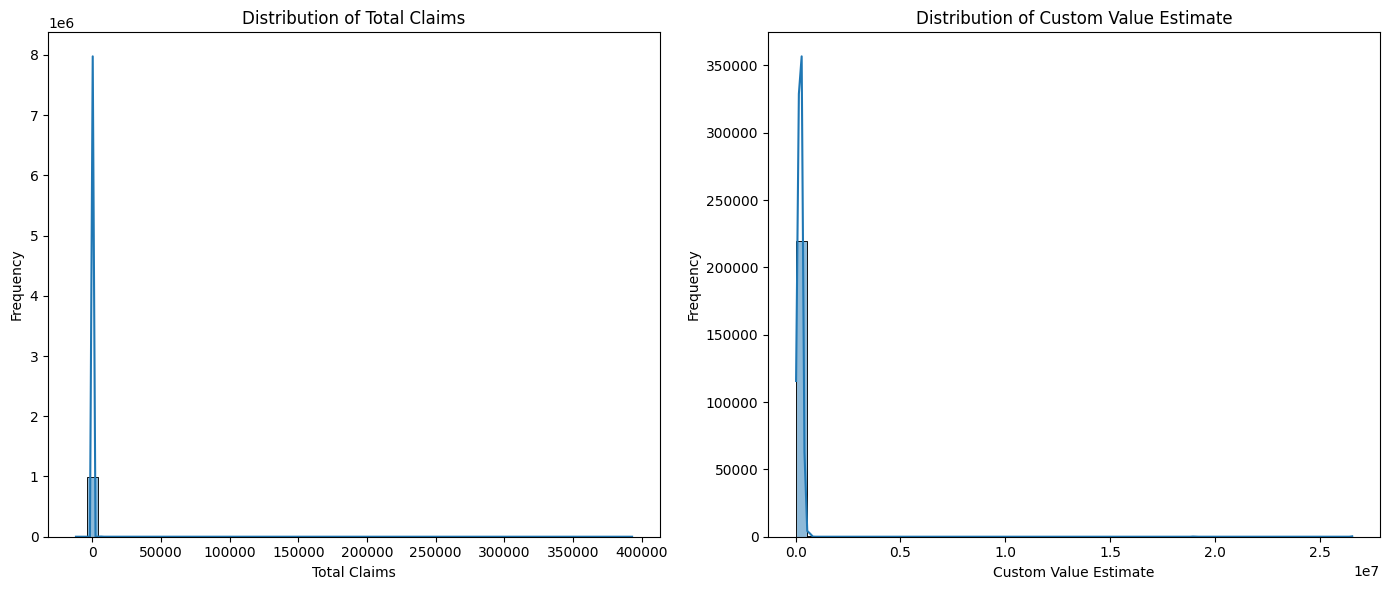

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot TotalClaims distribution
plt.subplot(1, 2, 1)
sns.histplot(data['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of Total Claims')
plt.xlabel('Total Claims')
plt.ylabel('Frequency')

# Plot CustomValueEstimate distribution
plt.subplot(1, 2, 2)
sns.histplot(data['CustomValueEstimate'], bins=50, kde=True)
plt.title('Distribution of Custom Value Estimate')
plt.xlabel('Custom Value Estimate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# Descriptive statistics for numerical features
numerical_stats = data[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].describe()
print("Descriptive Statistics:\n", numerical_stats)

Descriptive Statistics:
        TotalPremium   TotalClaims  CustomValueEstimate
count  1.000098e+06  1.000098e+06         2.204560e+05
mean   6.190550e+01  6.486119e+01         2.255311e+05
std    2.302845e+02  2.384075e+03         5.645157e+05
min   -7.825768e+02 -1.200241e+04         2.000000e+04
25%    0.000000e+00  0.000000e+00         1.350000e+05
50%    2.178333e+00  0.000000e+00         2.200000e+05
75%    2.192982e+01  0.000000e+00         2.800000e+05
max    6.528260e+04  3.930921e+05         2.655000e+07


In [15]:
# Review the data types of each column
data_types = data.dtypes
print("Data Types:\n", data_types)

Data Types:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors  

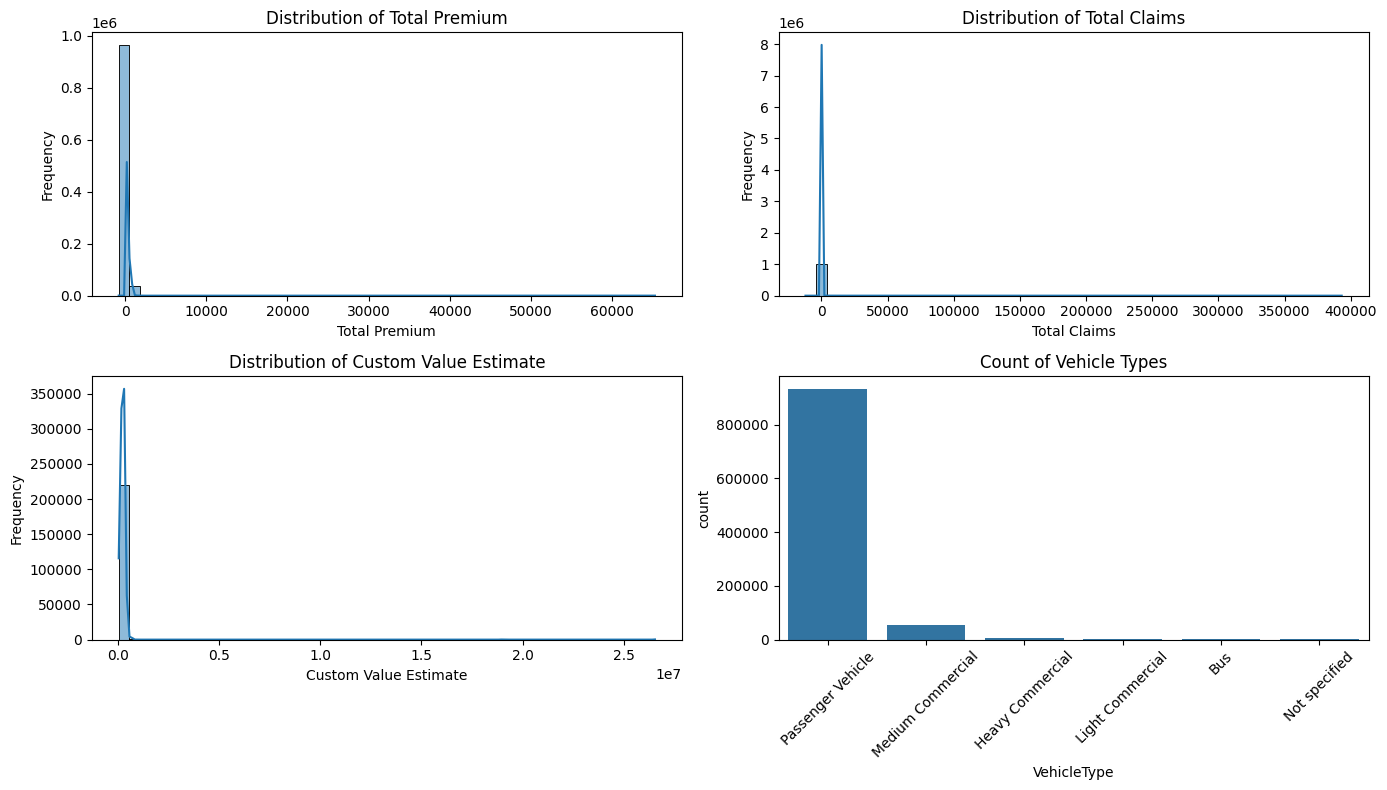

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Histograms for numerical columns
plt.subplot(2, 2, 1)
sns.histplot(data['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of Total Premium')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of Total Claims')
plt.xlabel('Total Claims')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data['CustomValueEstimate'], bins=50, kde=True)
plt.title('Distribution of Custom Value Estimate')
plt.xlabel('Custom Value Estimate')
plt.ylabel('Frequency')

# Bar charts for categorical columns
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='VehicleType', order=data['VehicleType'].value_counts().index)
plt.title('Count of Vehicle Types')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

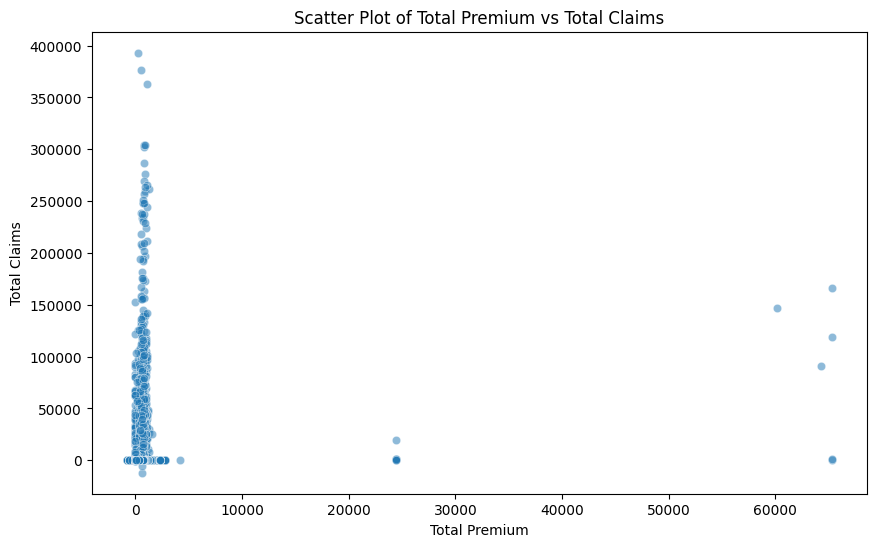

Correlation between Total Premium and Total Claims: 0.12158825999319918


In [17]:
# Scatter plot of TotalPremium vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', alpha=0.5)
plt.title('Scatter Plot of Total Premium vs Total Claims')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()

# Calculate the correlation
correlation = data['TotalPremium'].corr(data['TotalClaims'])
print("Correlation between Total Premium and Total Claims:", correlation)

C:\Users\arsem\AppData\Local\Temp\ipykernel_19288\2992156624.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Province', y='TotalPremium', estimator='mean', ci=None)
C:\Users\arsem\AppData\Local\Temp\ipykernel_19288\2992156624.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='VehicleType', y='TotalClaims', estimator='mean', ci=None)


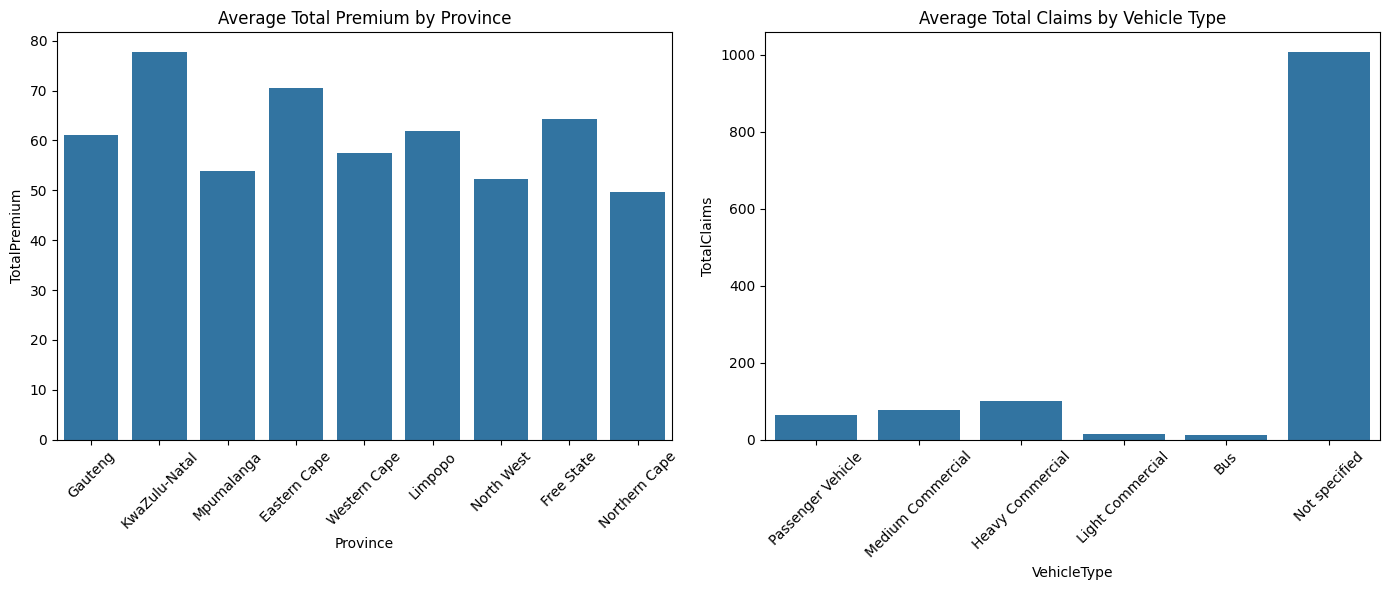

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Average Total Premium by Province
plt.subplot(1, 2, 1)
sns.barplot(data=data, x='Province', y='TotalPremium', estimator='mean', ci=None)
plt.title('Average Total Premium by Province')
plt.xticks(rotation=45)

# Average Total Claims by Vehicle Type
plt.subplot(1, 2, 2)
sns.barplot(data=data, x='VehicleType', y='TotalClaims', estimator='mean', ci=None)
plt.title('Average Total Claims by Vehicle Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Observations from the Charts

# Average Total Premium by Province:

Gauteng has the highest average total premium.
Northern Cape has the lowest average total premium.

# Average Total Claims by Vehicle Type:

The "Not specified" category has the highest average total claims.
Buses have lower average total claims compared to other vehicle types.

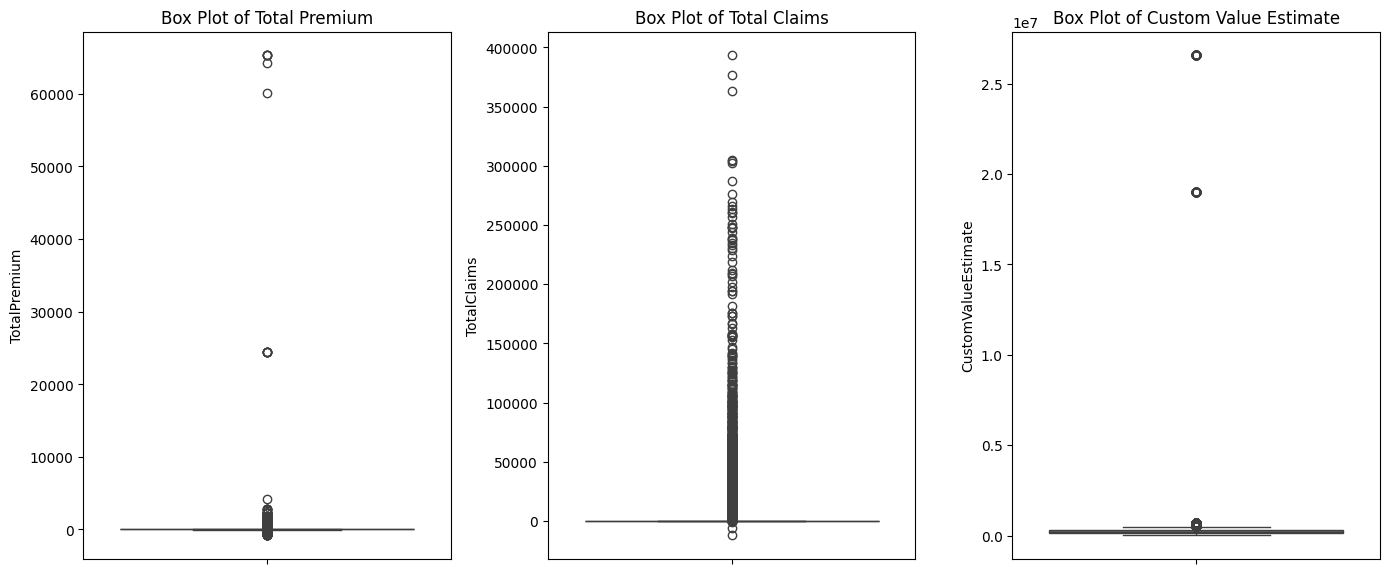

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Box plot for TotalPremium
plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='TotalPremium')
plt.title('Box Plot of Total Premium')

# Box plot for TotalClaims
plt.subplot(1, 3, 2)
sns.boxplot(data=data, y='TotalClaims')
plt.title('Box Plot of Total Claims')

# Box plot for CustomValueEstimate
plt.subplot(1, 3, 3)
sns.boxplot(data=data, y='CustomValueEstimate')
plt.title('Box Plot of Custom Value Estimate')

plt.tight_layout()
plt.show()

## Observations from the Box Plots

# Total Premium:

There are a few outliers on the higher end, indicating some very high premium values compared to the majority of the data.

# Total Claims:

The box plot shows a significant number of outliers, particularly on the upper end, suggesting that some claims are substantially higher than most.

# Custom Value Estimate:

Similar to Total Claims, there are many high outliers, indicating that some estimated values are far above the typical range.

## Visualizations

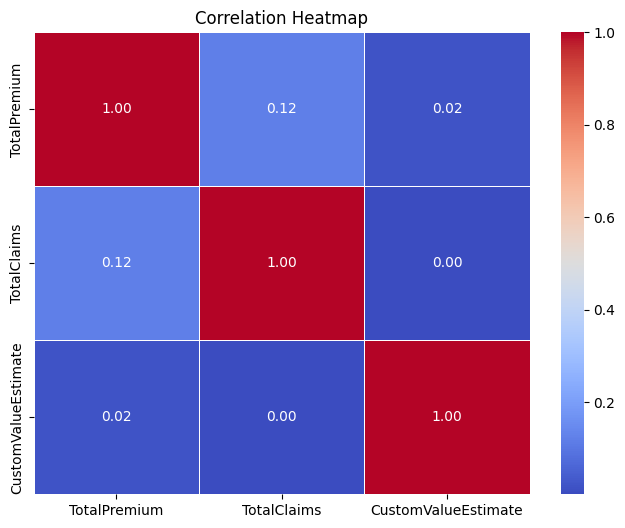

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].corr()

# Set up the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='VehicleType', y='TotalClaims', palette='Set2')
sns.swarmplot(data=data, x='VehicleType', y='TotalClaims', color='black', alpha=0.5)
plt.title('Total Claims by Vehicle Type with Outliers')
plt.xticks(rotation=45)
plt.show()

NameError: name 'data' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
g = sns.FacetGrid(data, col='Province', hue='VehicleType', col_wrap=3, height=4, aspect=1)
g.map(sns.barplot, 'VehicleType', 'TotalPremium', estimator='mean', ci=None)
g.add_legend()
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Total Premium by Province and Vehicle Type')
plt.show()